In [1]:
import numpy as np
import torch
import random
import pandas as pd
from transformers import AutoTokenizer, AutoModelForCausalLM
import matplotlib.pyplot as plt
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:64'

import utils

%load_ext autoreload
%autoreload 2

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Global variable model:

model_name = 'microsoft/Phi-3-mini-4k-instruct' #"openai-community/gpt2-xl" #"meta-llama/Llama-2-7b-hf" #openai-community/gpt2-xl 'microsoft/Phi-3-mini-4k-instruct
dataset_path = 'datasets/ilikecats_20000.csv' #'datasets/(non)animal_2000_gpt-4-turbo.csv'

# # Load model and dataset
# model = utils.LinearFeatureWrapper(model_name, data
model_hf = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype = torch.float16,  trust_remote_code=True)
tokenizer_hf = AutoTokenizer.from_pretrained(model_name)
layers = model_hf.model.layers # Depends on model! Typically model.model.layers. For gpt2: model.transformer.h

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]
/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:
dataset_size = 1028

dataset = utils.Dataset()
dataset.load_data(dataset_path, 'Animal', 'Non-Animal')
pos_dataset, neg_dataset = dataset.get_pos_neg_dataset(dataset_size)

In [6]:
model = utils.LinearFeatureWrapper(model_hf, tokenizer_hf, layers, pos_dataset, neg_dataset)
model.batch_size = 16
model.get_pos_neg_activations(dataset_size = -1)


Processing batch 1/17
Processing batch 2/17
Processing batch 3/17
Processing batch 4/17
Processing batch 5/17
Processing batch 6/17
Processing batch 7/17
Processing batch 8/17
Processing batch 9/17
Processing batch 10/17
Processing batch 11/17
Processing batch 12/17
Processing batch 13/17
Processing batch 14/17
Processing batch 15/17
Processing batch 16/17
Processing batch 1/17
Processing batch 2/17
Processing batch 3/17
Processing batch 4/17
Processing batch 5/17
Processing batch 6/17
Processing batch 7/17
Processing batch 8/17
Processing batch 9/17
Processing batch 10/17
Processing batch 11/17
Processing batch 12/17
Processing batch 13/17
Processing batch 14/17
Processing batch 15/17
Processing batch 16/17


Processing batch 1/33
Processing batch 2/33
Processing batch 3/33
Processing batch 4/33
Processing batch 5/33
Processing batch 6/33
Processing batch 7/33
Processing batch 8/33
Processing batch 9/33
Processing batch 10/33
Processing batch 11/33
Processing batch 12/33
Processing batch 13/33
Processing batch 14/33
Processing batch 15/33
Processing batch 16/33
Processing batch 17/33
Processing batch 18/33
Processing batch 19/33
Processing batch 20/33
Processing batch 21/33
Processing batch 22/33
Processing batch 23/33
Processing batch 24/33
Processing batch 25/33
Processing batch 26/33
Processing batch 27/33
Processing batch 28/33
Processing batch 29/33
Processing batch 30/33
Processing batch 31/33
Processing batch 32/33
Trained probe for layer: Layer_0
Trained probe for layer: Layer_1
Trained probe for layer: Layer_2
Trained probe for layer: Layer_3
Trained probe for layer: Layer_4
Trained probe for layer: Layer_5
Trained probe for layer: Layer_6
Trained probe for layer: Layer_7
Trained p

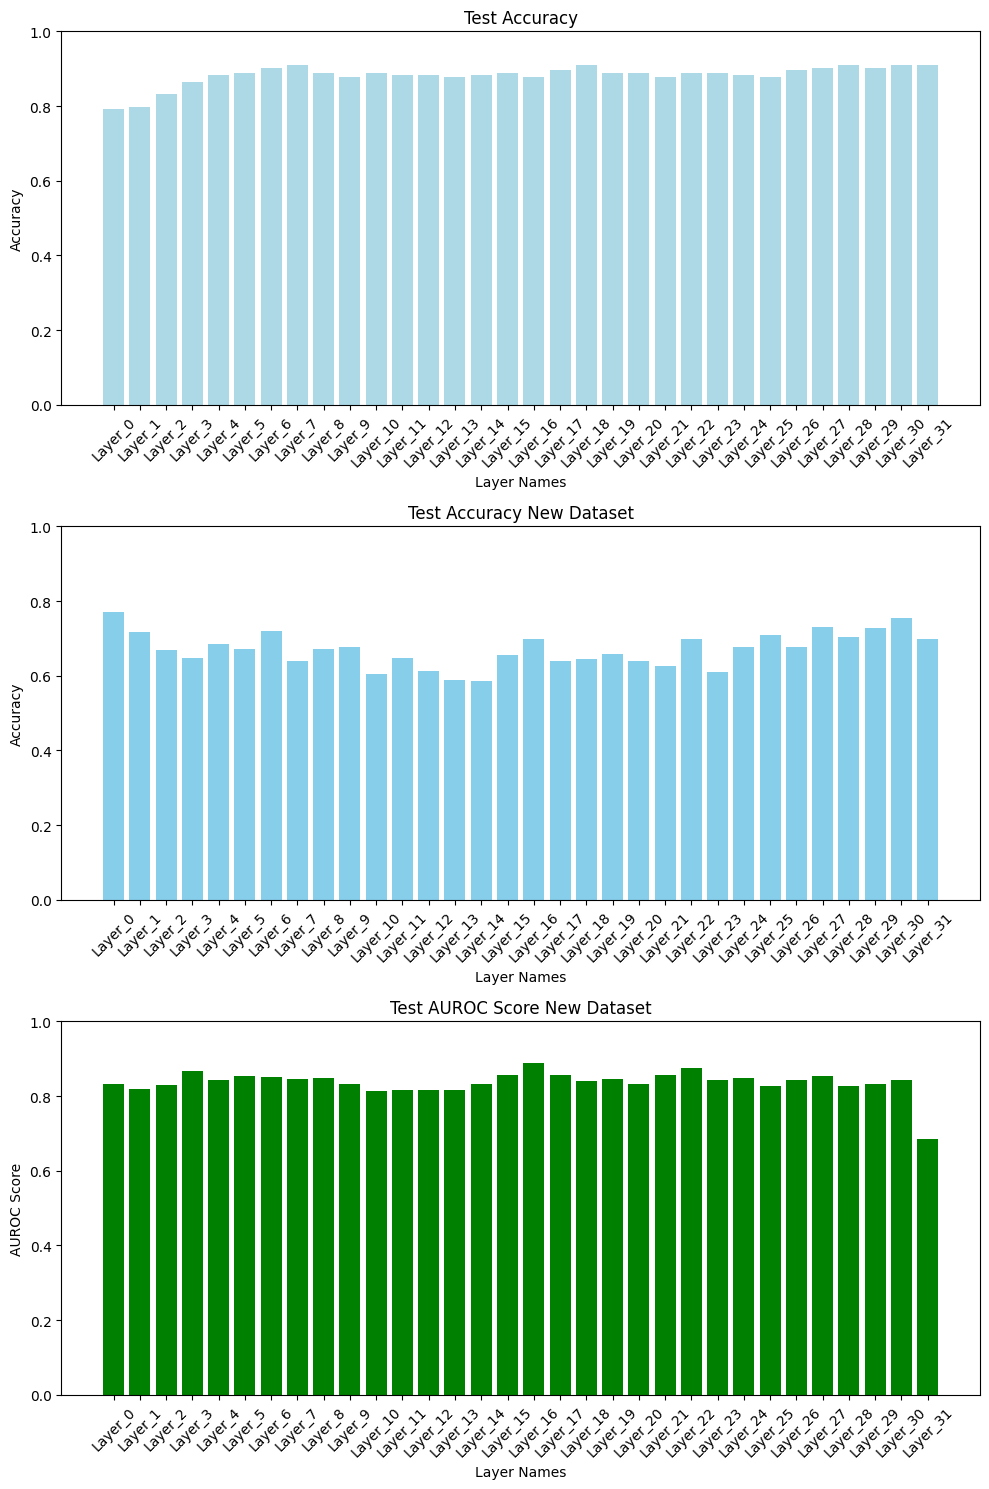

In [7]:
test_dataset = utils.Dataset()
test_dataset.load_data('datasets/hc_animal_phi3_inputs.csv', 'Animal', 'Non-Animal')
test_dataset_size = dataset_size
test_dataset_size = 256

test_dataset_1, labels = test_dataset.combine_dataset_get_labels(test_dataset_size)
_ = model.train_and_evaluate_probes(test_dataset_1, labels, max_iter = 10000, use_old_test_dataset=True)
# model.train_and_evaluate_probes(max_iter = 10000)